![EDA](src/PORT5.jpg)

# **EDA Siniestros y Víctimas**

*A continuación se realiza un análisis exploratorio usando **visualizaciones** con el fin de entender los datos posterior a su transformación*.

**Nota:** *En este análisis no nos enfocaremos en revisión de datos nulos, faltantes o duplicados, ya que esta etapa la realizamos previamente en el ETL de los datasets entregados.*

#### **Importación de librerías** ####
---

*Para este cuaderno usaremos las siguientes librerías: **pandas**, **seaborn** y **matplotlib**.*

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

#### **Extracción de los datos** ####
---

*Procedemos a abrir nuestros archivos limpios y almacenarlos en dataframes para visualizarlos.*

1. *Abrimos el archivo **siniestrosCABA.csv** y lo almacenamos en el dataframe **dfSiniestros**.*

In [77]:
dfSiniestros= pd.read_csv("dataout/siniestrosCABA.csv")
dfSiniestros.head(3)

,IdSiniestro,NumeroVictimas,Año,Mes,Dia,Hora,IdTransporteVictima,IdTransporteAcusado,Gravedad,Fecha,DiaSemana
0,20160001,1,2016,1,1,4.0,6.0,4.0,Victimas Mortales,2016-01-01,Viernes
1,20160002,1,2016,1,2,1.0,4.0,7.0,Victimas Mortales,2016-01-02,Sabado
2,20160003,1,2016,1,3,7.0,6.0,4.0,Victimas Mortales,2016-01-03,Domingo


2. *Abrimos el archivo **victimasCABA.csv** y lo almacenamos en el dataframe **dfVictimas**.*

In [78]:
dfVictimas= pd.read_csv("dataout/victimasCABA.csv")
dfVictimas.head(3)

,IdSiniestro,IdActorVictima,Sexo,TipoVictima,RangoEtario
0,20160001,3.0,Masculino,Fallecida,Adulto Joven
1,20160002,3.0,Masculino,Fallecida,Adulto Mayor
2,20160003,3.0,Masculino,Fallecida,Adulto 30 a 39


3. *Abrimos el archivo **actores.csv** y lo almacenamos en el dataframe **dfActores**.*

In [79]:
dfActores= pd.read_csv("dataout/actores.csv")
dfActores.head(4)

,IdActor,Actor
0,1,Peatón
1,2,Ciclista
2,3,Conductor
3,4,Pasajero


4. *Abrimos el archivo **modos.csv** y lo almacenamos en el dataframe **dfModos**.*

In [80]:
dfModos= pd.read_csv("dataout/modos.csv")
dfModos.head(15)

,IdModo,Modo
0,1,A Pie
1,2,Bicicleta
2,3,Patineta
3,4,Autómovil
4,5,Camioneta
5,6,Motocicleta
6,7,Transporte Público
7,8,Taxi
8,9,Transporte de Carga
9,10,Transporte de Emergencia


5. *Abrimos el archivo **siniestrosLocs.csv** y lo almacenamos en el dataframe **dfSiniestrosLocs**.*

In [81]:
dfSiniestrosLocs= pd.read_csv("dataout/siniestrosLocs.csv")
dfSiniestrosLocs.head(5)

,IdSiniestro,Longitud,Latitud,IdComuna,TipoVia,NombreVia
0,20160001,-58.47533969,-34.68757022,8.0,Via Principal,PIEDRA BUENA AV.
1,20160002,-58.50877521,-34.66977709,9.0,Autopista,"PAZ, GRAL. AV."
2,20160003,-58.39040293,-34.63189362,1.0,Via Principal,ENTRE RIOS AV.
3,20160004,-58.46503904,-34.68092974,8.0,Via Principal,LARRAZABAL AV.
4,20160005,-58.38718297,-34.62246630,1.0,Via Principal,SAN JUAN AV.


### **Análisis Exploratorio**
---

*Vamos a realizar una **exploración de los datos** (EDA) centrada en las relaciones de los mismos y sus variaciones.*

1. *Definimos los códigos de color que usaremos en los gráficos de todo el proyecto.*

In [82]:
azulOsc = "#426A8C"
azulClaro = "#B4CED9"
piel = "#F28963"
zapote = "#D96055"
rojo = "#D93232"

#### **Sobre la distribución de los datos y outliers** ####

*En primera medida identificaremos los comportmientos de los datos, para identificar si existen valores atípicos.*

1. *Creamos un **stripplot** que nos permite pasar como parametro los numeros de victimas y establecer los puntos donde se encuentran.*

<Axes: xlabel='NumeroVictimas'>

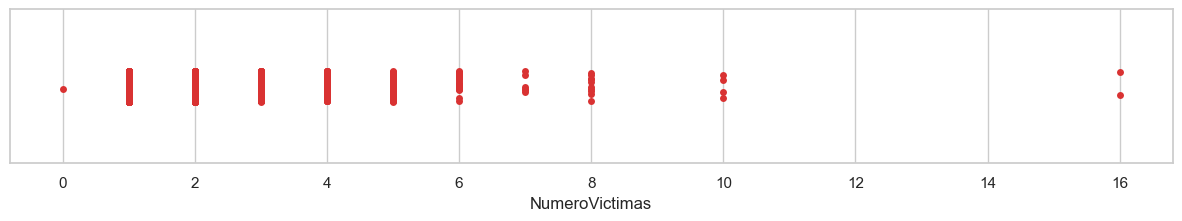

In [83]:
sns.set(style="whitegrid")

# Tamaño del gráfico
plt.figure(figsize=(15, 2))

# Subplot1 : Dispersión número de victimas
sns.stripplot(x="NumeroVictimas", data=dfSiniestros, jitter=True, color=rojo)

**Conclusiones**

* Observamos que en la mayoría de ocasiones el numero de victimas no supera los 10.
* Sin embargo existen casos en donde la gravedad del accidente aumenta el numero de victimas.

#### **Sobre la disctribución de los accidentes en el tiempo** ####

*Vamos a obtener información sobre como se comportan los siniestros por series temporales.*

1. *Creamos una serie que nos agrupe la cantidad de siniestros por año.*

In [84]:
countSinXYear = dfSiniestros.Año.value_counts().sort_index()
countSinXYear

Año
2016      144
2017      131
2018      143
2019    10176
2020     6064
2021     7823
Name: count, dtype: int64

2. *Creamos una serie que nos agrupe la cantidad de siniestros por mes y creamos una lista de los meses en español.*

In [85]:
countSinMonth = dfSiniestros.Mes.value_counts().sort_index()
monthNames = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre",]

3. *Creamos una serie que nos agrupe la cantidad de siniestros por dia de la semana, y los organizamos de Lunes a Domingo.*

In [86]:
countSinDay = dfSiniestros.DiaSemana.value_counts()
countSinDay

DiaSemana
Viernes      4203
Jueves       3960
Miercoles    3941
Martes       3798
Lunes        3579
Sabado       2794
Domingo      2206
Name: count, dtype: int64

In [87]:
ordenSemanal = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]
countSinDay= countSinDay.reindex(ordenSemanal)
countSinDay

DiaSemana
Lunes        3579
Martes       3798
Miercoles    3941
Jueves       3960
Viernes      4203
Sabado       2794
Domingo      2206
Name: count, dtype: int64

4. *Creamos una serie que nos agrupe la cantidad de siniestros por hora del día*

In [93]:
countSinHour = dfSiniestros.Hora.value_counts().sort_index()
countSinHour

Hora
0.0      830
1.0      365
2.0      250
3.0      181
4.0      186
5.0      306
6.0      463
7.0      725
8.0     1067
9.0     1153
10.0    1162
11.0    1297
12.0    1582
13.0    1627
14.0    1660
15.0    1583
16.0    1742
17.0    1764
18.0    1585
19.0    1380
20.0    1166
21.0    1003
22.0     792
23.0     602
Name: count, dtype: int64

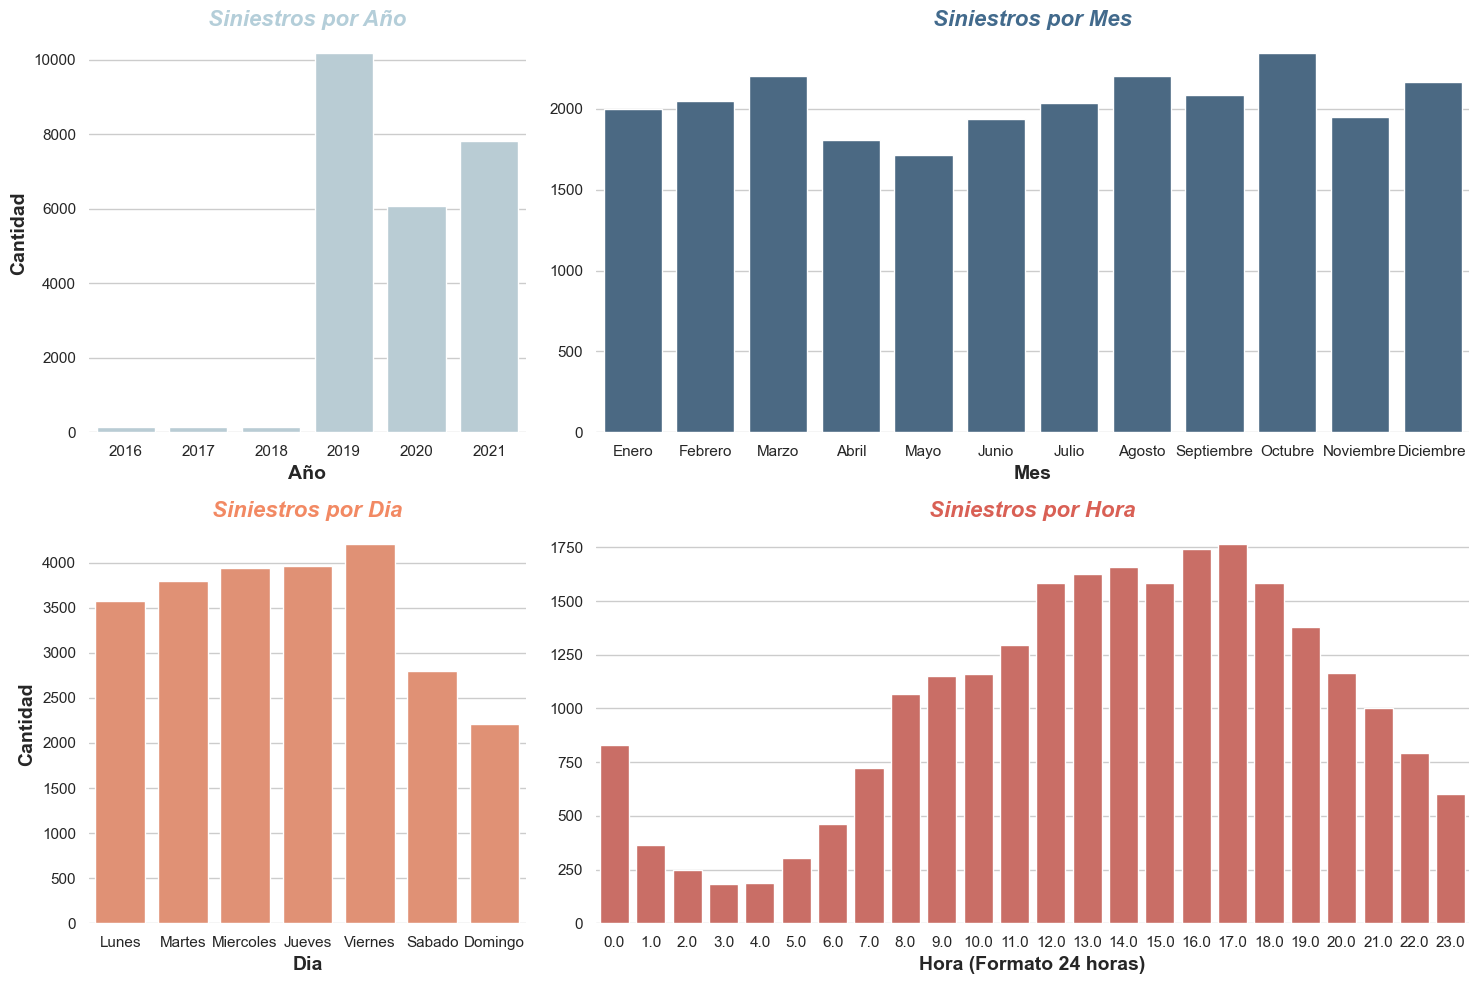

In [116]:
# Estilo del gráfico
sns.set(style="whitegrid")

# Creamos una gráfica de subplots y ajustamos para que la segunda columna tenga más espacio.
fig, axes = plt.subplots(2, 2, figsize=(15, 10), gridspec_kw={'width_ratios': [1, 2]})

# Subplot 1: Cantidad de Siniestros por Año
sns.barplot(x=countSinXYear.index, y=countSinXYear.values, color=azulClaro, ax=axes[0, 0])  
axes[0, 0].set_title('Siniestros por Año',fontsize=16, fontweight='bold', fontstyle='italic', color=azulClaro)
axes[0, 0].set_xlabel('Año',fontsize=14 ,fontweight='bold')
axes[0, 0].set_ylabel('Cantidad',fontsize=14 ,fontweight='bold')
axes[0, 0].spines[['top', 'right','bottom', 'left']].set_color('none')

# Subplot 2: Cantidad de Siniestros por Mes
sns.barplot(x=monthNames, y=countSinMonth.values, color=azulOsc, ax=axes[0, 1])
axes[0, 1].set_title('Siniestros por Mes',fontsize=16, fontweight='bold', fontstyle='italic', color=azulOsc)
axes[0, 1].set_xlabel("Mes",fontsize=14 ,fontweight='bold')
axes[0, 1].spines[['top', 'right','bottom', 'left']].set_color('none')

# Subplot 3: Cantidad de Siniestros por Dia
sns.barplot(x=countSinDay.index, y=countSinDay.values, color=piel, ax=axes[1, 0])  
axes[1, 0].set_title('Siniestros por Dia',fontsize=16, fontweight='bold', fontstyle='italic', color=piel)
axes[1, 0].set_xlabel('Dia',fontsize=14 ,fontweight='bold')
axes[1, 0].set_ylabel('Cantidad',fontsize=14 ,fontweight='bold')
axes[1, 0].spines[['top', 'right','bottom', 'left']].set_color('none')

# Subplot 4: Count plot para las horas de la columna HORA
sns.barplot(x=countSinHour.index, y=countSinHour.values, color=zapote, ax=axes[1, 1])
axes[1, 1].set_title('Siniestros por Hora',fontsize=16, fontweight='bold', fontstyle='italic', color=zapote)
axes[1, 1].set_xlabel('Hora (Formato 24 horas)',fontsize=14 ,fontweight='bold')
axes[1, 1].spines[['top', 'right','bottom', 'left']].set_color('none')


# Ajustamos el espacio entre los subplots, para no tener datos sobrepuestos
plt.tight_layout()

plt.show()

**Conclusiones**

* *Si observamos las cifras por año, observamos un mayor valor de datos entre **2019 y 2021**, una causa de esto podría ser la disponibilidad de datos en la plataforma de siniestros de la ciudad.*
* *Ahora bien, comparando solo los **3 últimos años**, podemos observar una **reducción de los siniestros en el año 2020**, esto podría ser como consecuencia de las medidas de restricción en la movilidad a causa de la pandemia.*
* *En cambio en el año **2021** la cifra de siniestralidad **aumentó**, como posible consecuencia de esto la eliminación de medidas de restricción debido a un mayor control de la pandemia.*

* *Con respecto a la siniestraldiad mensual, podemos observar un comportamiento estable en todos los meses, sin embargo en el mes de **octubre** se ha presentado mayor número de siniestros viales.*

* *Con respecto a la siniestraldiad por dia de la semana, observamos que los dias laborables son los días en que se presentan mayor numero de siniestros, comparado a los fines de semana, esto podría deberse a un mayor número de actores viales circulando por la ciudad.*

* *Con respecto a la siniestraldiad por hora del día, observamos que la tasa de siniestros aumenta en las horas pico del día desde las 8 AM hasta las 9 PM, con más de 1000 registros obtenidos*

#### **Sobre la disctribución de los siniestros por meses** ####

*Vamos a obtener información sobre como se comportan los siniestros por series temporales mensuales solo a partir de 2019*

1. *Creamos una serie que nos agrupe la cantidad de siniestros por MES-AÑO*

In [150]:
serieTemp = dfSiniestros["Fecha"].astype(str).str.slice(stop=7)
serieTemp = serieTemp[serieTemp >= "2019"]
serieTemp.head(5)

418    2019-01
419    2019-01
420    2019-01
421    2019-01
422    2019-01
Name: Fecha, dtype: object

2. *Contamos los valores por mes-año*

In [151]:
serieTemp= serieTemp.value_counts().sort_index()
serieTemp.head(5)

Fecha
2019-01     750
2019-02     802
2019-03     963
2019-04     968
2019-05    1052
Name: count, dtype: int64

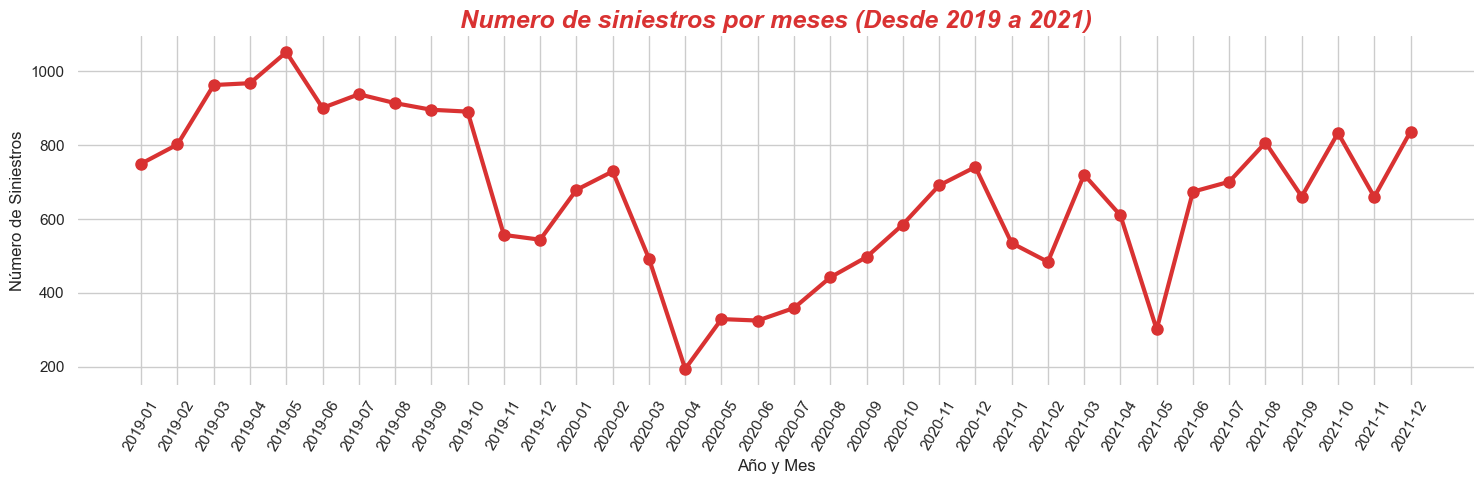

In [169]:
# Estilo del gráfico
sns.set(style="whitegrid")

# Creamos el gráfico de líneas
plt.figure(figsize=(15, 5))
plt.plot(serieTemp.index, serieTemp.values, marker='o', color=rojo, linewidth=3, markersize=8)

# Añadir títulos y etiquetas
plt.title('Numero de siniestros por meses (Desde 2019 a 2021)',fontsize=18, fontweight='bold', fontstyle='italic', color=rojo)
plt.xlabel('Año y Mes')
plt.ylabel('Número de Siniestros')
plt.gca().spines[['top', 'right','bottom', 'left']].set_color('none')

# Rotamos las etiquetas del eje x para mejor comprensión.
plt.xticks(rotation=60)

# Mostramos el gráfico y lo ajustamos visualmente.
plt.tight_layout()
plt.show()

**Conclusiones**

* *Se puede observar una caída del número de siniestros entre febrero de 2020 y abril de 2020, posterior a esta fecha el número de siniestros empezó a crecer.
* *Entre diciembre de 2020  hasta diciembre de 2021 el número de siestros se ha mantenido aproximadamente en 700 por mes.
* *Se puede observar que ha medida que se fueron eliminando restricciones a la movilidad el número de siniestros fue aumentando.

#### **Sobre el modo de transporte en los siniestros** ####

*Vamos a obtener información de los modos de transporte que usaban las personas que fueron consideradas como victimas del siniestro y las que fueron acusadas como responsables:*

**Modo de Transporte Victima**: Medio de transporte en el que se transportaba la persona afectada por un siniestro vial.

**Modo de Transporte Acusado**: Medio de transporte en el que se transportaba la persona involucrada y acusada como causante del siniestro vial.

1. *Creamos un dataframe que organice el modo de transporte en que iban las victimas de mayor a menor numero de siniestros:*

In [193]:
sinByModoVic = dfSiniestros.IdTransporteVictima.value_counts()
sinByModoVic = pd.DataFrame({"IdModo": sinByModoVic.index, "Total": sinByModoVic.values})
sinByModoVic = pd.merge(sinByModoVic,dfModos, how="left", on="IdModo")
sinByModoVic

,IdModo,Total,Modo
0,6.0,5756,Motocicleta
1,1.0,2291,A Pie
2,2.0,2238,Bicicleta
3,4.0,2116,Autómovil
4,7.0,762,Transporte Público
5,5.0,189,Camioneta
6,8.0,182,Taxi
7,10.0,102,Transporte de Emergencia
8,12.0,42,Multiple
9,3.0,28,Patineta


2. *Creamos un dataframe que organice el modo de transporte en que iban los responsables del siniestro de mayor a menor numero de siniestros:*

In [194]:
sinByModoAcu = dfSiniestros.IdTransporteAcusado.value_counts()
sinByModoAcu = pd.DataFrame({"IdModo": sinByModoAcu.index, "Total": sinByModoAcu.values})
sinByModoAcu = pd.merge(sinByModoAcu,dfModos, how="left", on="IdModo")
sinByModoAcu

,IdModo,Total,Modo
0,4.0,4845,Autómovil
1,7.0,1436,Transporte Público
2,5.0,872,Camioneta
3,6.0,682,Motocicleta
4,8.0,591,Taxi
5,11.0,341,Objeto Inmovil
6,9.0,175,Transporte de Carga
7,2.0,84,Bicicleta
8,10.0,81,Transporte de Emergencia
9,13.0,30,Otro


C:\Users\derob\AppData\Local\Temp\ipykernel_42804\2494270109.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sinByModoVic.Total, y=sinByModoVic.Modo, palette=colors_vic, ax=axes[0], dodge=False)
C:\Users\derob\AppData\Local\Temp\ipykernel_42804\2494270109.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sinByModoAcu.Total, y=sinByModoAcu.Modo, palette=colors_acu, ax=axes[1], dodge=False)


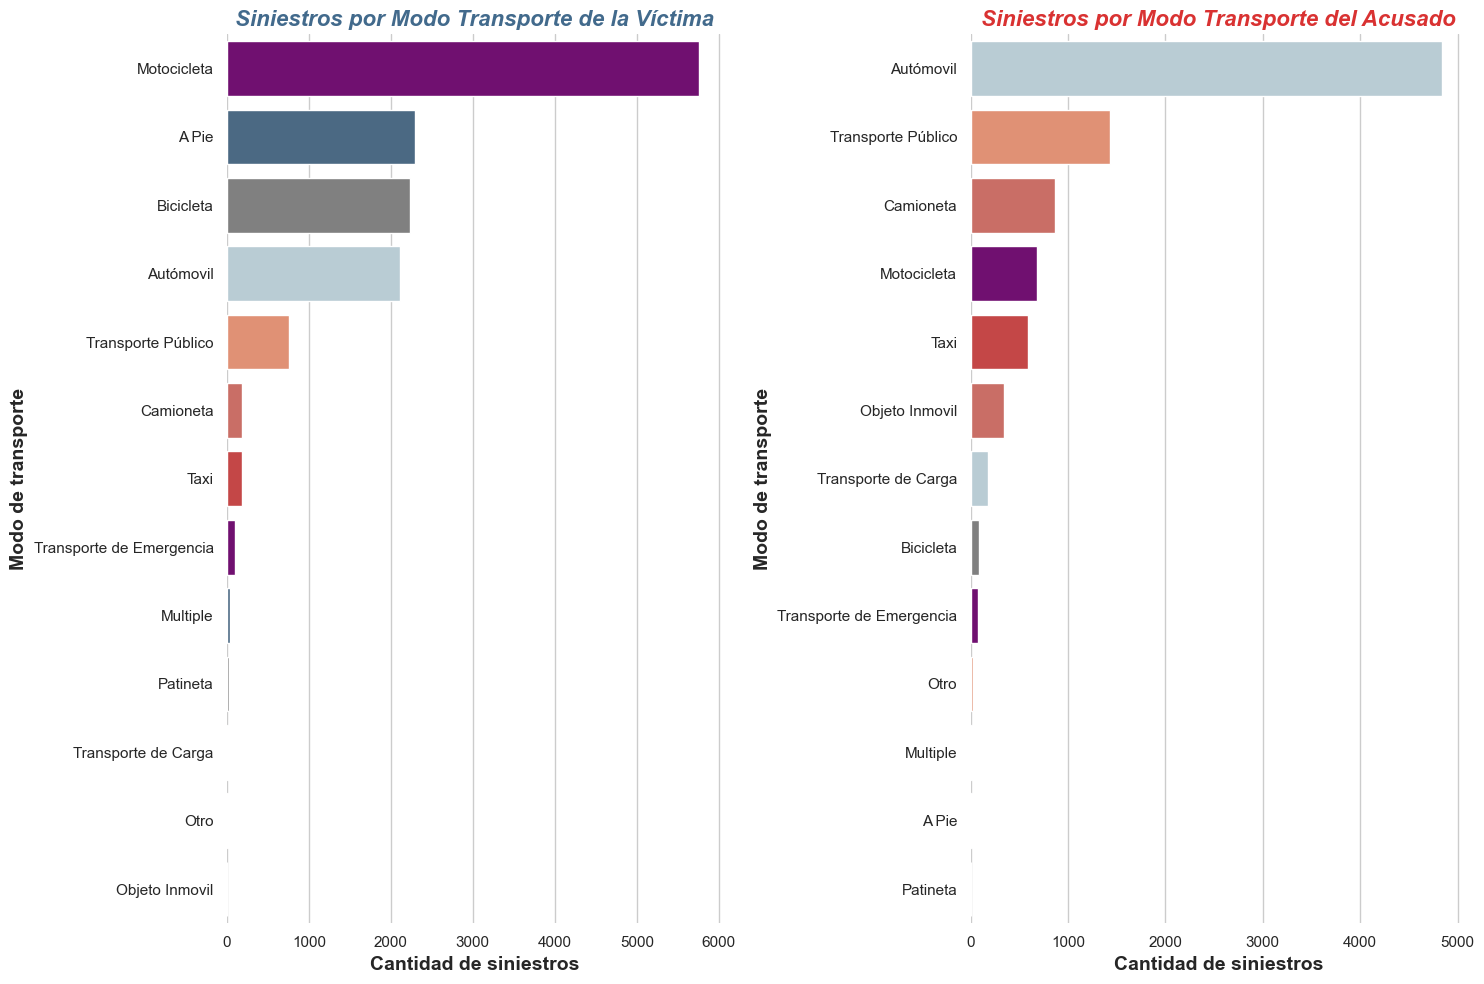

In [236]:
# Estilo del gráfico
sns.set(style="whitegrid")

# Creamos una gráfica de subplots y ajustamos para que la segunda fila tenga más espacio.
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Asignamos colores específicos a cada barra en el primer subplot
colors_vic = ["purple", azulOsc, "grey", azulClaro, piel, zapote, rojo, "purple", azulOsc, "grey", azulClaro, piel, zapote] 
sns.barplot(x=sinByModoVic.Total, y=sinByModoVic.Modo, palette=colors_vic, ax=axes[0], dodge=False)
axes[0].set_title("Siniestros por Modo Transporte de la Víctima", fontsize=16, fontweight='bold', fontstyle='italic', color=azulOsc)
axes[0].set_xlabel('Cantidad de siniestros', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Modo de transporte', fontsize=14, fontweight='bold')
axes[0].spines[['top', 'right','bottom', 'left']].set_color('none')

# Asignamos colores específicos a cada barra en el segundo subplot
colors_acu = [azulClaro, piel, zapote, "purple", rojo, zapote, azulClaro, "grey", "purple", piel, azulOsc, azulOsc, "grey" ] 
sns.barplot(x=sinByModoAcu.Total, y=sinByModoAcu.Modo, palette=colors_acu, ax=axes[1], dodge=False)
axes[1].set_title("Siniestros por Modo Transporte del Acusado", fontsize=16, fontweight='bold', fontstyle='italic', color=rojo)
axes[1].set_xlabel("Cantidad de siniestros", fontsize=14, fontweight='bold')
axes[1].set_ylabel("Modo de transporte", fontsize=14, fontweight='bold')
axes[1].spines[['top', 'right','bottom', 'left']].set_color('none')

# Ajustamos el espacio entre los subplots, para no tener datos sobrepuestos
plt.tight_layout()

plt.show()


**Conclusiones**

* *Se observa que el modo de transporte más afectado en los siniestros es la **Motocicleta con más de 5000 siniestros**.*
* *Las personas que se movilizan a pie y en bicicleta son unas de las más afectadas en siniestros viales, con más de 2000 siniestros en la base de datos*
* *El modo de transporte que más siniestros viales produce es el automovil con más de 4000 registros en los que están implicados conductores de automovil como responsables del siniestro.*

#### **Sobre los siniestros por comuna** ####

*Vamos a obtener información sobre la cantidad de siniestros por comuna en la ciudad de Buenos Aires*

**Comuna:** *División territorial de la ciudad que agrupa barrios. Equivalente a Localidad o Distrito.*

1. *Creamos una Serie que nos muestre un **conteo del total de juegos** distribuido por publicador.*
2. *.**Filtramos solo los 10 publicadores** con mayor número de juegos.*
3. *Creamos un **gráfico de barras** que nos muestre la cantidad de videojuegos vendidos por publicador.*

In [243]:
sinByCom = dfSiniestrosLocs.IdComuna.value_counts()
sinByCom

IdComuna
1.0     2616
15.0    1952
4.0     1805
3.0     1763
9.0     1747
14.0    1616
7.0     1576
12.0    1477
11.0    1443
13.0    1395
10.0    1376
5.0     1248
8.0     1127
6.0      978
2.0      903
Name: count, dtype: int64

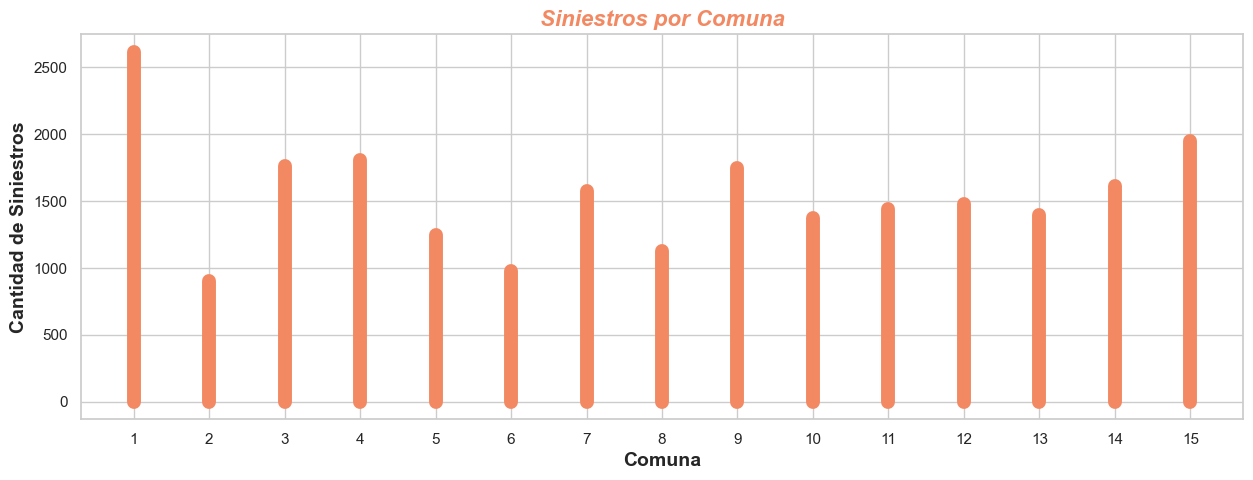

In [266]:
# Estilo del gráfico
sns.set(style="whitegrid")

# Asignamos colores específicos a cada punto comuna.
colores_comunas = [azulOsc, azulClaro, piel, zapote, rojo, azulOsc, azulClaro, piel, zapote, rojo, azulOsc, azulClaro, piel, zapote, rojo]

# Crear un gráfico de dispersión
plt.figure(figsize=(15, 5))

# Iteramos sobre cada comuna y trazamos lineas verticales.
for comuna, cantidad in zip(sinByCom.index, sinByCom.values):
    plt.plot([comuna, comuna], [0, cantidad], linewidth=10, color=piel)
    

# Añadiimos titulos y etiquetas

plt.title('Siniestros por Comuna', fontsize=16, fontweight='bold', fontstyle='italic', color=piel)
plt.xlabel('Comuna', fontsize=14, fontweight='bold')
plt.ylabel('Cantidad de Siniestros', fontsize=14, fontweight='bold')

# Configuramos las etiquetas del eje x
plt.xticks(sinByCom.index)

# Mostrar el gráfico
plt.show()


**Conclusiones**

* *Se observa que la **Comuna 1** es la que mayor número de siniestros ha presentado, consolidando más de 2500 registros de siniestros.*
* *Las comunas con menor número de siniestros son la **Comuna 2** y la **Comuna 6**.*

#### **Sobre las vías y su relación con los siniestros** ####

*Vamos a obtener información sobre los tipos de via en donde ocurren los siniestros y las 5 vías que se pueden considerar como las de más alta siniestralidad.*

1. *Creamos una Serie que nos muestre un **conteo del total de juegos** distribuido por desarrollador.*
2. *.**Filtramos solo los 10 desarrolladores** con mayor número de juegos.*
3. *Creamos un **gráfico de barras** que nos muestre la cantidad de videojuegos vendidos por desarrollador.*

In [278]:
sinByTipoV = dfSiniestrosLocs.TipoVia.value_counts()
sinByTipoV

TipoVia
Via Principal    7204
Via Local        5519
Autopista         713
Name: count, dtype: int64

In [276]:
Top5SinByVia = dfSiniestrosLocs.NombreVia.value_counts().head(5)
Top5SinByVia

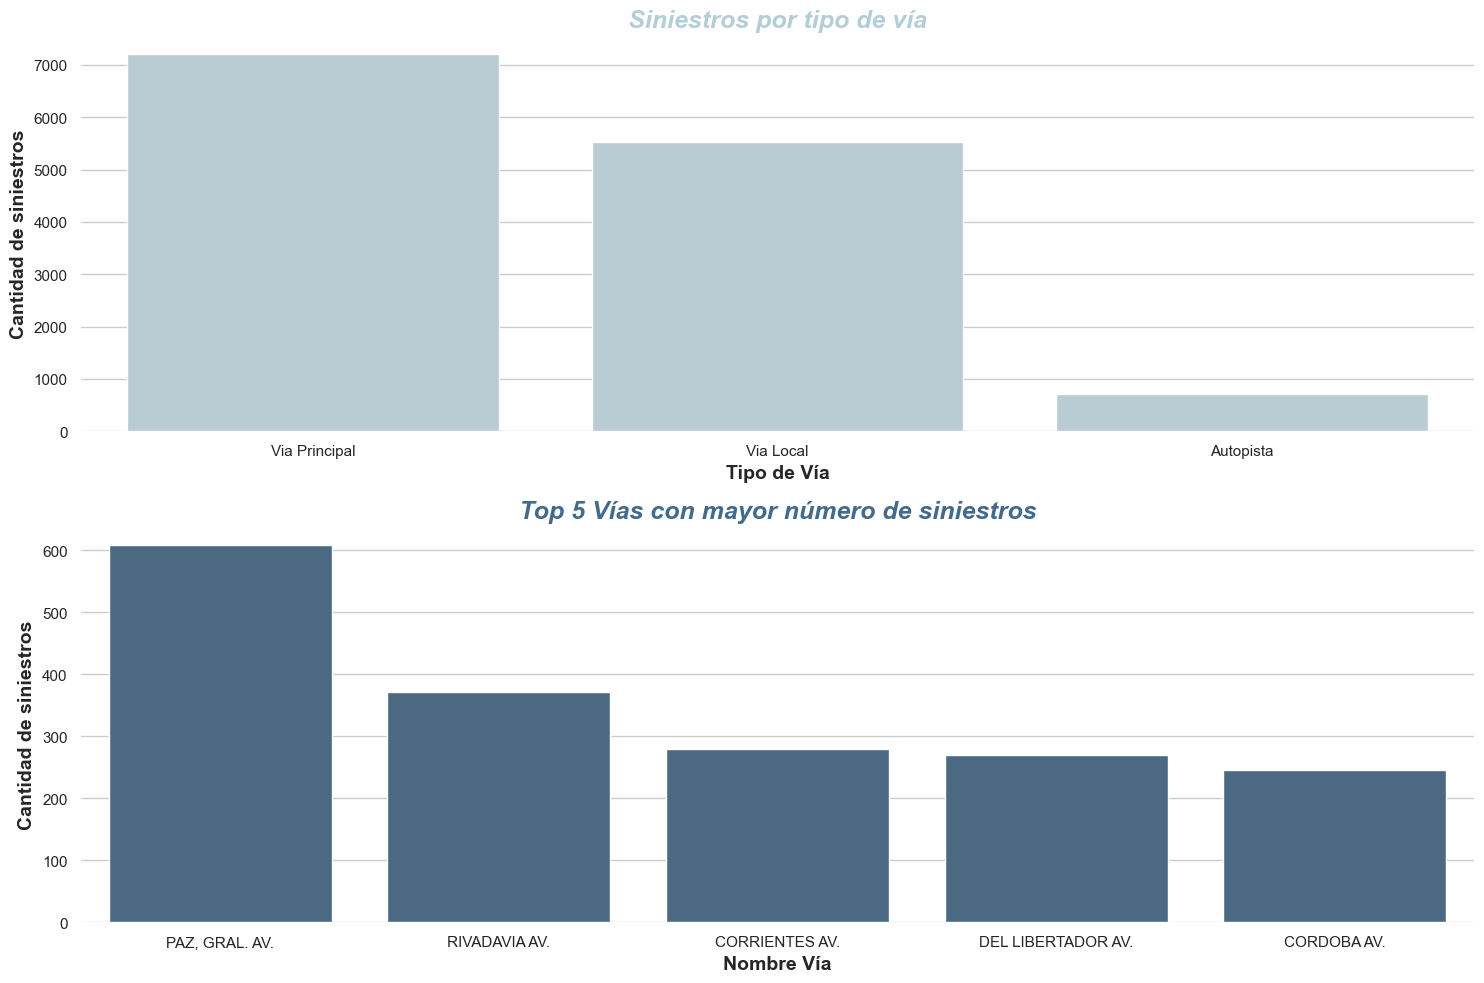

In [281]:
# Estilo del gráfico
sns.set(style="whitegrid")

# Creamos una gráfica de subplots y ajustamos para que la segunda columna tenga más espacio.
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Subplot 1: Cantidad de Siniestros por Año
sns.barplot(x=sinByTipoV.index, y=sinByTipoV.values, color=azulClaro, ax=axes[0])  
axes[0].set_title('Siniestros por tipo de vía',fontsize=18, fontweight='bold', fontstyle='italic', color=azulClaro)
axes[0].set_xlabel('Tipo de Vía',fontsize=14 ,fontweight='bold')
axes[0].set_ylabel('Cantidad de siniestros',fontsize=14 ,fontweight='bold')
axes[0].spines[['top', 'right','bottom', 'left']].set_color('none')

# Subplot 2: Cantidad de Siniestros por Mes
sns.barplot(x=Top5SinByVia.index, y=Top5SinByVia.values, color=azulOsc, ax=axes[1])
axes[1].set_title("Top 5 Vías con mayor número de siniestros",fontsize=18, fontweight='bold', fontstyle='italic', color=azulOsc)
axes[1].set_xlabel("Nombre Vía",fontsize=14 ,fontweight='bold')
axes[1].set_ylabel('Cantidad de siniestros',fontsize=14 ,fontweight='bold')
axes[1].spines[['top', 'right','bottom', 'left']].set_color('none')


# Ajustamos el espacio entre los subplots, para no tener datos sobrepuestos
plt.tight_layout()

plt.show()

**Conclusiones**

* Se observa que las vías con mayor siniestralidad son las vias principales, también pueden ser clasificadas como Avenidas o vias intermedias.
* La vía con mayor cantidad de registros de siniestros es la Avenida Paz General, una autopista muy importante en la ciudad de Buenos Aires.

#### **Sobre las gravedad de los siniestros y la gravedad de las víctimas** ####

*Vamos a obtener información sobre la gravedad de los siniestros, con el fin de obtener información de los indices de mortalidad en el transito:*

1. *Creamos una Serie que nos muestre un **conteo del nivel de gravedad de los siniestros** medidos en el saldo de victimas.*
2. *Creamos una Serie que nos muestre un **conteo de los tipos de victima** tomados del dataframe victimas.*
3. *Creamos una Serie que nos muestre un **conteo de las victimas por genero** tomados del dataframe victimas.*

In [286]:
gravSin = dfSiniestros.Gravedad.value_counts()
gravSin

Gravedad
Victimas Heridas Leves     23139
Victimas Mortales            699
Victimas Heridas Graves      643
Name: count, dtype: int64

In [344]:
tipoVict = dfVictimas.TipoVictima.value_counts()
tipoVict

TipoVictima
Lesionada               27068
Fallecida                 717
Gravemente Lesionada      537
Name: count, dtype: int64

In [345]:
sexoVict = dfVictimas.Sexo.value_counts()
sexoVict

Sexo
Masculino    17567
Femenino      8521
Name: count, dtype: int64

C:\Users\derob\AppData\Local\Temp\ipykernel_42804\3606666154.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gravSin.values, y=gravSin.index, palette=colors_vic, ax=axes[0,0], dodge=False)
C:\Users\derob\AppData\Local\Temp\ipykernel_42804\3606666154.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipoVict.values, y=tipoVict.index, palette=colors_acu, ax=axes[1,0], dodge=False)


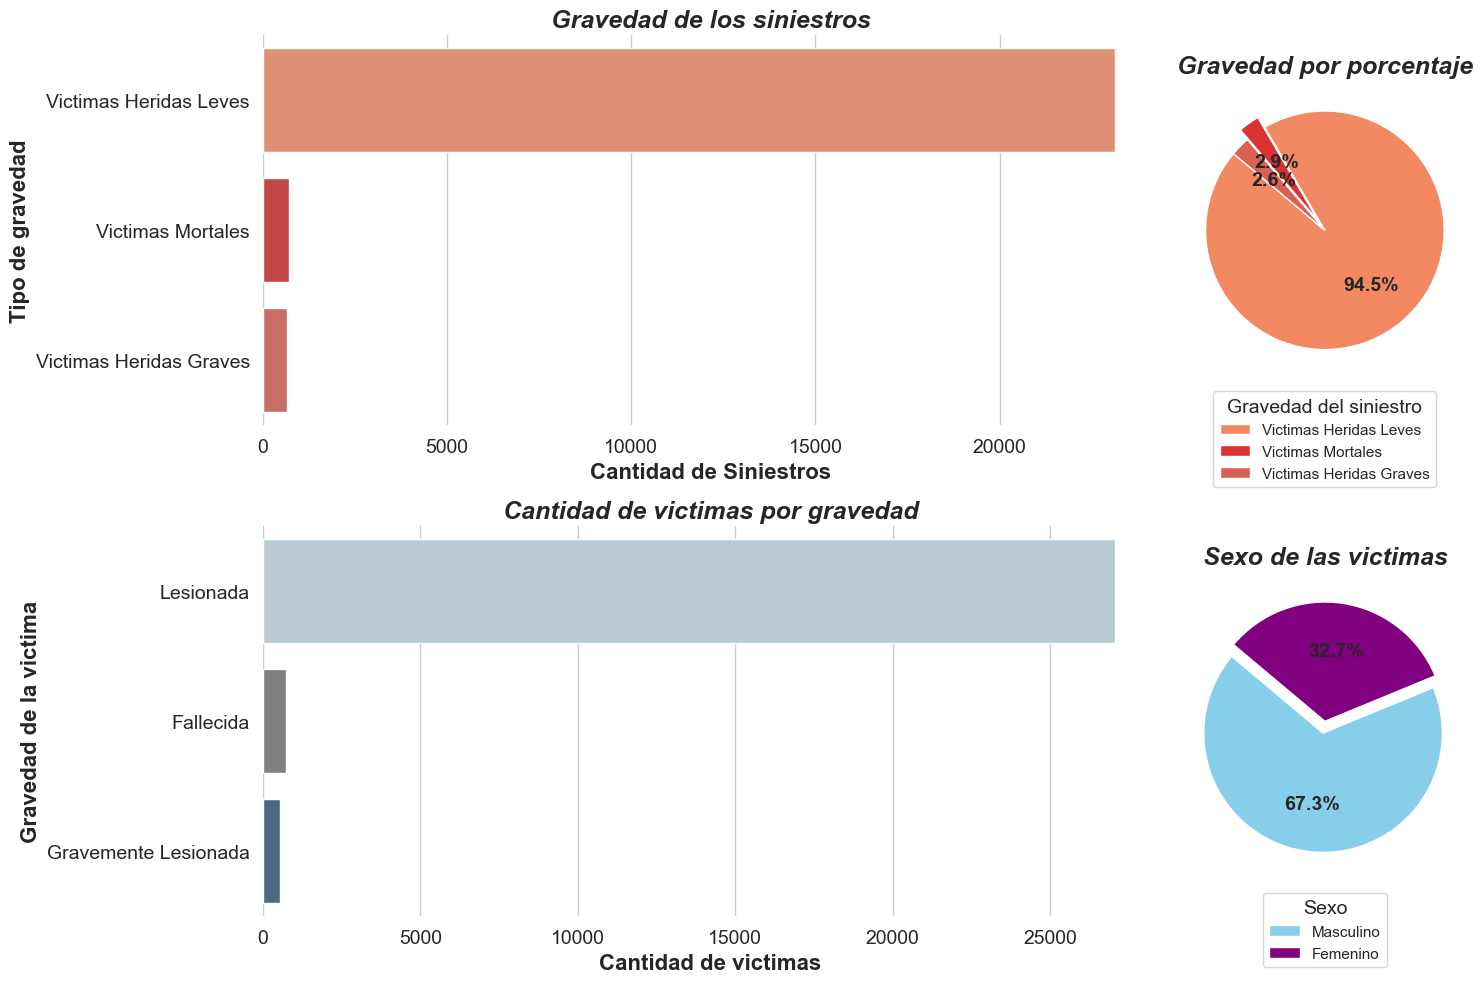

In [360]:
# Estilo del gráfico
sns.set(style="whitegrid")

# Creamos una gráfica de subplots y ajustamos para que la primera columna tenga más espacio.
fig, axes = plt.subplots(2, 2, figsize=(15, 10), gridspec_kw={'width_ratios': [3, 1]})

# Asignamos colores específicos a cada barra en el primer subplot
colors_vic = [piel, rojo, zapote] 
sns.barplot(x=gravSin.values, y=gravSin.index, palette=colors_vic, ax=axes[0,0], dodge=False)
axes[0, 0].set_title("Gravedad de los siniestros", fontsize=18, fontweight='bold', fontstyle='italic')
axes[0, 0].set_xlabel("Cantidad de Siniestros", fontsize=16, fontweight='bold')
axes[0, 0].set_ylabel("Tipo de gravedad", fontsize=16, fontweight='bold')
axes[0, 0].spines[['top', 'right','bottom', 'left']].set_color('none')
axes[0, 0].tick_params(axis='both', labelsize=14)

# Segundo subplot
coloresGrav = [piel, rojo, zapote]
desfase = (0, 0.1, 0)
axes[0, 1].pie(gravSin.values.tolist(), autopct='%1.1f%%', startangle=140, colors=coloresGrav, explode=desfase, textprops={'fontsize': 14, "fontweight":'bold'})  # Cambia el tamaño del porcentaje
axes[0, 1].set_title("Gravedad por porcentaje", fontsize=18, fontweight='bold', fontstyle='italic')
axes[0, 1].legend(gravSin.index, title="Gravedad del siniestro", title_fontsize="14", loc="center", bbox_to_anchor=(0.5, -0.2))

# Asignamos colores específicos a cada barra en el segundo subplot
colorsTipVict = [azulClaro, "grey", azulOsc] 
sns.barplot(x=tipoVict.values, y=tipoVict.index, palette=colorsTipVict, ax=axes[1,0], dodge=False)
axes[1,0].set_title("Cantidad de victimas por gravedad", fontsize=18, fontweight='bold', fontstyle='italic')
axes[1,0].set_xlabel("Cantidad de victimas", fontsize=16, fontweight='bold')
axes[1,0].set_ylabel("Gravedad de la victima", fontsize=16, fontweight='bold')
axes[1,0].spines[['top', 'right','bottom', 'left']].set_color('none')
axes[1, 0].tick_params(axis='both', labelsize=14)

# Cuarto subplot
coloresSexo = ["skyblue", "purple"]
desfase = (0.1, 0)
axes[1, 1].pie(sexoVict.values.tolist(), autopct='%1.1f%%', startangle=140, colors=coloresSexo, explode=desfase, textprops={'fontsize': 14, "fontweight":'bold'})  # Cambia el tamaño del porcentaje
axes[1, 1].set_title("Sexo de las victimas", fontsize=18, fontweight='bold', fontstyle='italic')
axes[1, 1].legend(sexoVict.index, title="Sexo", title_fontsize="14", loc="center", bbox_to_anchor=(0.5, -0.2)) 

# Ajustamos el espacio entre los subplots, para no tener datos sobrepuestos
plt.tight_layout()

plt.show()

**Conclusiones**

* Se observa que el nivel de gravedad de los siniestros en su mayoría es Nivel 1 - Con victimas lesionadas.

* El 94.5% de los siniestros deja como saldo victimas heridas, existe un 2.9% de siniestros que de gravedad alta con victimas fatales y el 2.6% restante deja victimas con lesiones graves.

* En cuanto a la medición de victimas, podemos observar que más de 25000 victimas tuvieron lesiones moderadas.

* En cuanto al sexo podemos observar que el mayor número de victimas son los hombres con el 67% de las victimas.

#### **Sobre los rangos de edad de las victimas y su sexo** ####

*Vamos a obtener información sobre la gravedad de los siniestros, con el fin de obtener información de los indices de mortalidad en el transito:*

1. *Creamos una Serie que nos muestre un **conteo del nivel de gravedad de los siniestros** medidos en el saldo de victimas.*
2. *Creamos una Serie que nos muestre un **conteo de los tipos de victima** tomados del dataframe victimas.*
3. *Creamos una Serie que nos muestre un **conteo de las victimas por genero** tomados del dataframe victimas.*

In [394]:
# Definir el orden deseado de las categorías de rango etario
ordenRango = ['Infante', 'Adolescente', 'Adulto Joven', 'Adulto 30 a 39', 'Adulto 40 a 49', 'Adulto 50 a 59', "Adulto Mayor"]

# Agrupar los datos por rango etario y sexo, contar el número de registros en cada grupo
rangoGenero = dfVictimas.groupby(['RangoEtario', 'Sexo']).size().unstack()

# Reordenar las filas del DataFrame según el orden definido
rangoGenero = rangoGenero.loc[ordenRango]

In [432]:
rangoGenero

Sexo,Femenino,Masculino
RangoEtario,,
Infante,135,164
Adolescente,205,264
Adulto Joven,2057,5382
Adulto 30 a 39,1820,4624
Adulto 40 a 49,1324,2868
Adulto 50 a 59,899,1498
Adulto Mayor,1219,1245


In [392]:
dfActorGenero = dfVictimas[["IdActorVictima", "Sexo"]].copy()
dfActorGenero.rename(columns={"IdActorVictima":"IdActor"}, inplace=True)
dfActorGenero = pd.merge(dfActorGenero, dfActores, how="left", on="IdActor")

In [393]:
# Agrupar los datos por rango etario y sexo, contar el número de registros en cada grupo
actorGenero = dfActorGenero.groupby(['Actor', 'Sexo']).size().unstack()
actorGenero


Sexo,Femenino,Masculino
Actor,,
Ciclista,580,1104
Conductor,1398,5309
Pasajero,513,280
Peatón,877,924


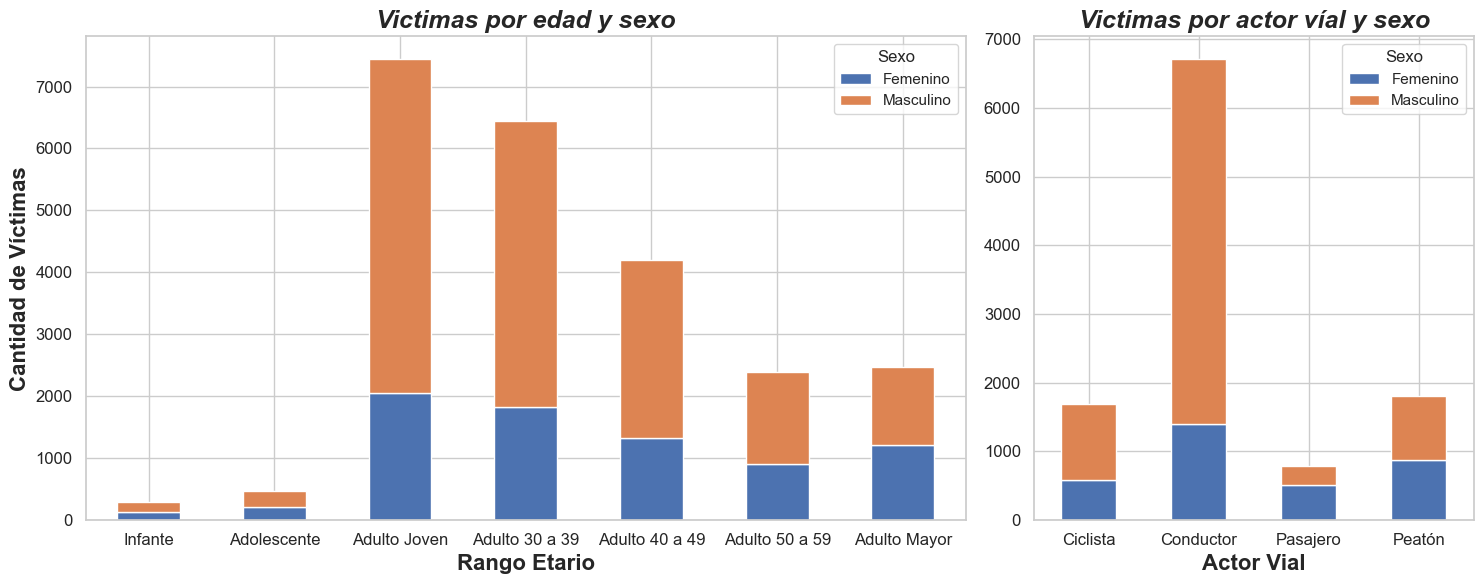

In [431]:
# Estilo del gráfico
sns.set(style="whitegrid")

# Creamos una figura con dos subplots uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [2, 1]})

# Grafico 1: Distribución de víctimas por rango etario y sexo
rangoGenero.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title("Victimas por edad y sexo", fontsize=18, fontweight='bold', fontstyle='italic')
axes[0].set_xlabel('Rango Etario', fontsize=16, fontweight='bold')
axes[0].set_ylabel('Cantidad de Víctimas', fontsize=16, fontweight='bold')
axes[0].tick_params(axis='both', rotation=0, labelsize=12)  # Rotar etiquetas del eje x para mejor legibilidad
axes[0].legend(title='Sexo')

# Grafico 2: Distribución de víctimas por rango etario y sexo
actorGenero.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title("Victimas por actor víal y sexo", fontsize=18, fontweight='bold', fontstyle='italic')
axes[1].set_xlabel("Actor Vial", fontsize=16, fontweight='bold')
axes[1].tick_params(axis='both', rotation=0, labelsize=12)  # Rotar etiquetas del eje x para mejor legibilidad
axes[1].legend(title='Sexo')

# Ajustamos el espacio entre los subplots, para no tener datos sobrepuestos
plt.tight_layout()

plt.show()


**Conclusiones**

* *Se observa que el mayor número de victimas se presenta en adultos Jovenes en un rango entre los 18 y 29 años, siendo jovenes hombres las dos terceras partes de esta población.*

* *Se observa que los mayores números de victimas se encuentran en los adultos entre 18 a 49 años.*

* *Se observa que la brecha entre hombres y mujeres se balancea en las victimas mayores.*

* *El actor vial que más sufre consecuencias de los siniestros es el conductor y en donde la brecha entre mujeres y hombres se hace más evidente.*

* *Los ciclistas y peatones tiene indices muy similares*